In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)

plt.rcParams['figure.figsize'] = (8, 5)


In [8]:
df = pd.read_csv(r"C:\Users\hannah\Downloads\archive (2)\heart_disease.csv")  # from feature selection

X = df.drop(columns=["target"])
y = df["target"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale (important for SVM & Logistic)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM with no probability, fallback to decision_function
        try:
            y_proba = model.decision_function(X_test)
        except:
            y_proba = None

    print(f"\n📊 {name} Results:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))
    if y_proba is not None:
        print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



📊 Logistic Regression Results:
Accuracy: 0.917
Precision: 1.0
Recall: 0.821
F1 Score: 0.902
ROC AUC: 0.972


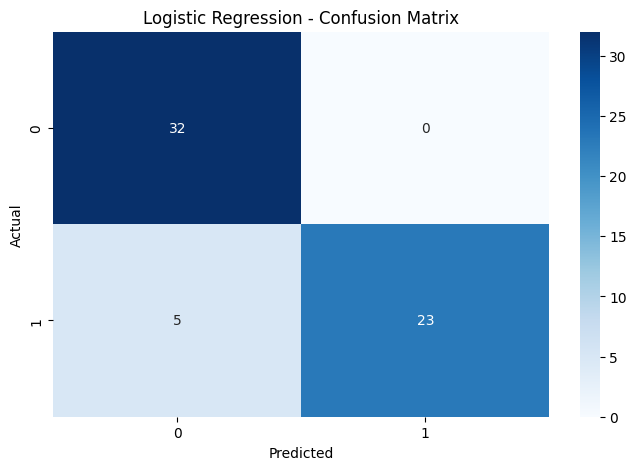

In [10]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")



📊 Decision Tree Results:
Accuracy: 0.867
Precision: 0.917
Recall: 0.786
F1 Score: 0.846
ROC AUC: 0.903


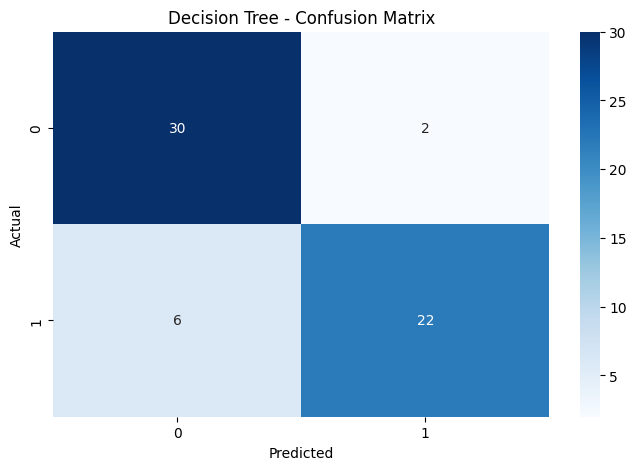

In [11]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
evaluate_model(tree, X_test, y_test, "Decision Tree")



📊 Random Forest Results:
Accuracy: 0.867
Precision: 0.917
Recall: 0.786
F1 Score: 0.846
ROC AUC: 0.951


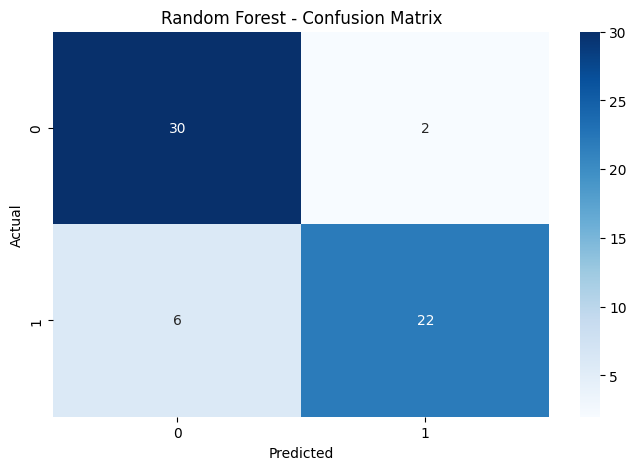

In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")



📊 SVM Results:
Accuracy: 0.883
Precision: 0.957
Recall: 0.786
F1 Score: 0.863
ROC AUC: 0.964


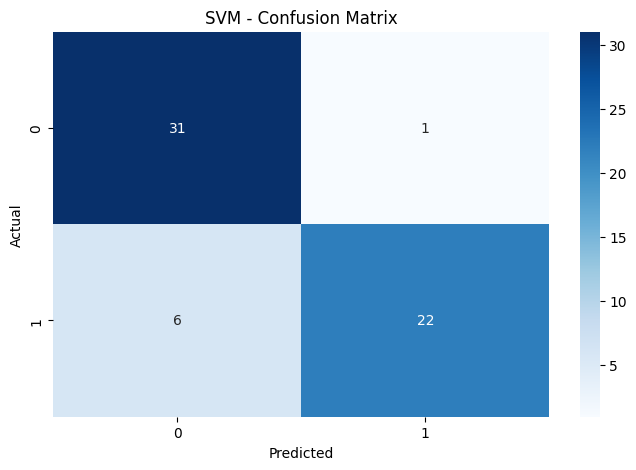

In [13]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_model(svm, X_test_scaled, y_test, "SVM")


In [14]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "Random Forest": rf,
    "SVM": svm
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled if "SVM" in name or "Logistic" in name else X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1"])
print(results_df.sort_values(by="F1", ascending=False))


                 Model  Accuracy        F1
0  Logistic Regression  0.916667  0.901961
3                  SVM  0.883333  0.862745
1        Decision Tree  0.866667  0.846154
2        Random Forest  0.866667  0.846154


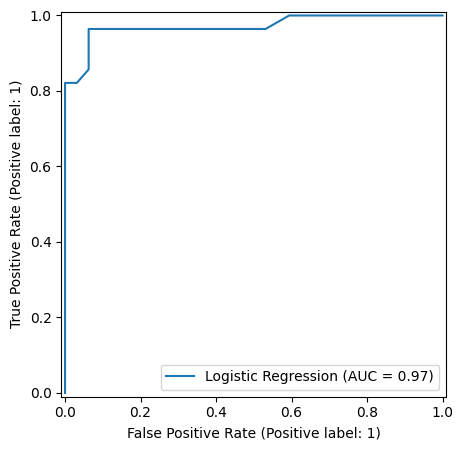

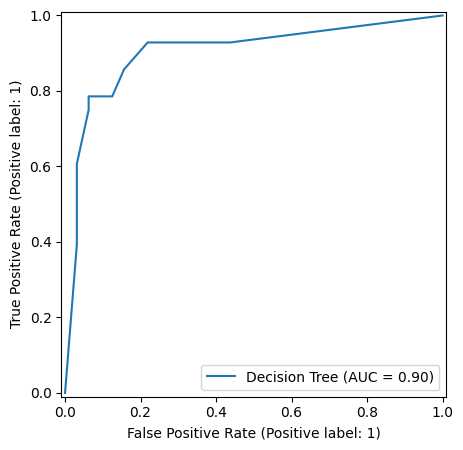

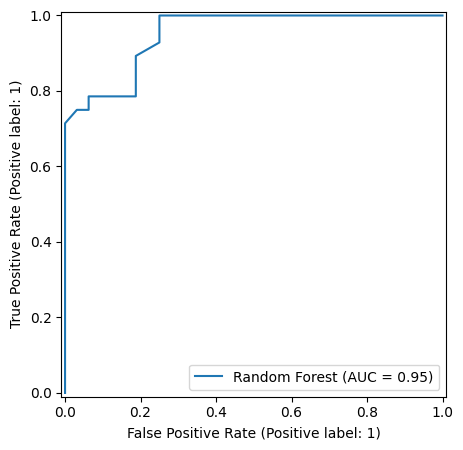

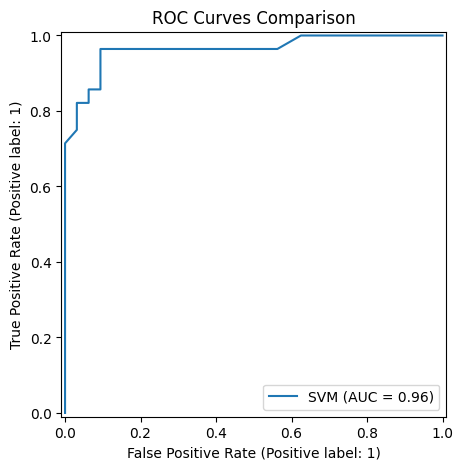

In [15]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test_scaled if "SVM" in name or "Logistic" in name else X_test, y_test, name=name)
plt.title("ROC Curves Comparison")
plt.show()


In [17]:
import os, joblib
os.makedirs("../models", exist_ok=True)  # create folder if missing
joblib.dump(best_model, "../models/final_model.pkl")



['../models/final_model.pkl']